<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
Sex                100 non-null object
Age                100 non-null int64
Height (Inches)    100 non-null float64
Weight (Pounds)    100 non-null float64
BMI                100 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB
None
              Age  Height (Inches)  Weight (Pounds)         BMI
count  100.000000       100.000000       100.000000  100.000000
mean    27.710000        67.753037       124.101520    2.420000
std      5.347132         2.061955        16.745017    1.036505
min     18.000000        63.125500        83.085300    0.000000
25%     23.750000        66.535825       116.573575    2.000000
50%     28.000000        67.805600       124.675200    3.000000
75%     32.250000        69.064800       134.534375    3.000000
max     35.000000        73.268700       164.586500    4.000000


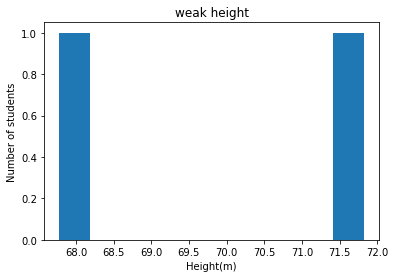

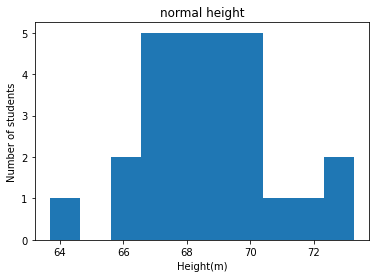

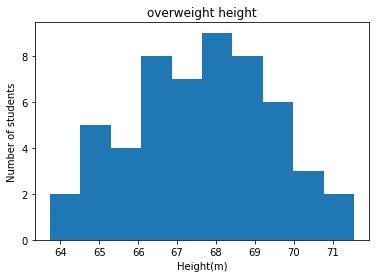

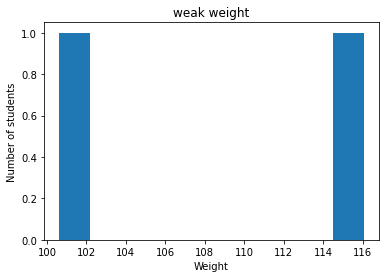

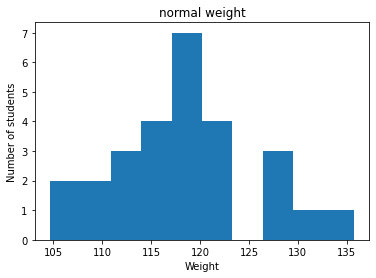

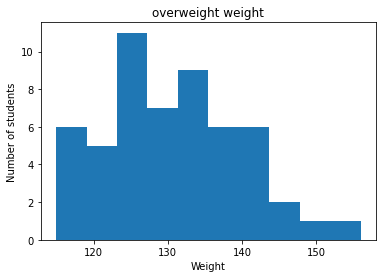

      height    weight
0  -1.931566 -0.441653
1  -0.468575  0.063254
2   1.651409  0.780854
3  -0.540957 -2.227918
4   0.837467  0.878867
..       ...       ...
95 -0.506447  0.359879
96 -0.038134 -0.274617
97 -0.884198 -2.385303
98  0.426279  0.018287
99 -1.577894  1.464442

[100 rows x 2 columns]


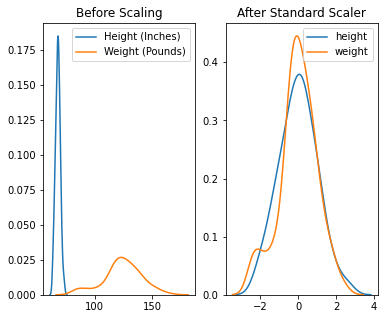

      height    weight
0   0.065532  0.412973
1   0.361444  0.516190
2   0.790244  0.662887
3   0.346804  0.047812
4   0.625611  0.682924
..       ...       ...
95  0.353784  0.576828
96  0.448507  0.447120
97  0.277378  0.015638
98  0.542442  0.506997
99  0.137067  0.802631

[100 rows x 2 columns]


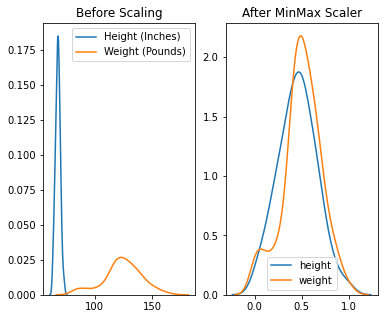

      height    weight
0  -1.587758 -0.441634
1  -0.400913  0.026736
2   1.318914  0.692408
3  -0.459633 -2.098637
4   0.658607  0.783328
..       ...       ...
95 -0.431637  0.301896
96 -0.051721 -0.286685
97 -0.738086 -2.244633
98  0.325033 -0.014977
99 -1.300843  1.326528

[100 rows x 2 columns]


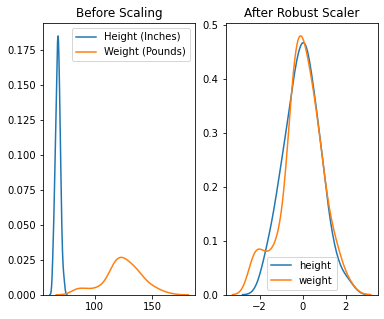

Linear regression (y = Bx +A)(Weight = B * Height + A)
B = 1.5894856229286454 A = 16.409041778747483
-------------------------------------------------------------------
Total Height and Weight Done
-------------------------------------------------------------------


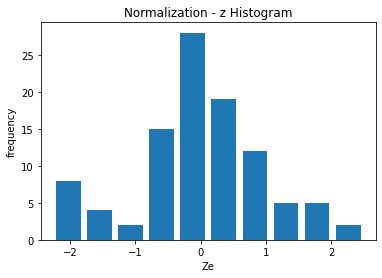

[alpha = 0.5]
- Number of bmi with different values: 33

[alpha = 0.8]
- Number of bmi with different values: 17

[alpha = 1.0]
- Number of bmi with different values: 10

[alpha = 1.5]
- Number of bmi with different values: 1

[alpha = 1.8]
- Number of bmi with different values: 0

Linear regression (y = fBx + fA)(Female_weight = fB*Female_height + fA)
fB = 0.7921330564592722 fA = 72.10442225650738
-------------------------------------------------------------------
Female Gender Done
-------------------------------------------------------------------
Linear regression (y = mBx + mA)(Male_weight = mB*Male_height + mA)
mB = 2.2202385683397385 mA = -27.523701852965996
-------------------------------------------------------------------
Male Gender Done
-------------------------------------------------------------------


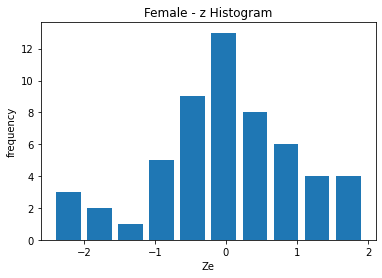

[alpha = 0.5]
- Number of bmi with different values: 29

[alpha = 0.8]
- Number of bmi with different values: 19

[alpha = 1.0]
- Number of bmi with different values: 15

[alpha = 1.5]
- Number of bmi with different values: 8

[alpha = 1.8]
- Number of bmi with different values: 4



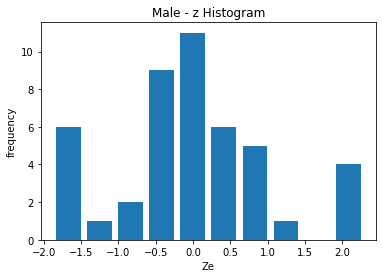

[alpha = 0.5]
- Number of bmi with different values: 19

[alpha = 0.8]
- Number of bmi with different values: 10

[alpha = 1.0]
- Number of bmi with different values: 6

[alpha = 1.5]
- Number of bmi with different values: 1

[alpha = 1.8]
- Number of bmi with different values: 0



In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

path = "bmi_data_phw3.xlsx"

#read csv file
dataset = pd.read_excel(path)

#print dataset statistical data, feature names & data types
print(dataset.info())
print(dataset.describe())


#plot hieght & weight histograms(bins=10) for each BMI value
height = dataset['Height (Inches)'].to_numpy()
weight = dataset['Weight (Pounds)'].to_numpy()
gender = dataset['Sex'].to_numpy()
bmi = dataset['BMI'].to_numpy()

weakHeight = np.where(dataset.loc[:,'BMI'] == 1)
weakHeight = height[weakHeight]
weakWeight = np.where(dataset.loc[:,'BMI'] == 1)
weakWeight = weight[weakWeight]
normalHeight = np.where(dataset.loc[:,'BMI'] == 2)
normalHeight = height[normalHeight]
normalWeight = np.where(dataset.loc[:,'BMI'] == 2)
normalWeight = weight[normalWeight]
overweightHeight = np.where(dataset.loc[:,'BMI'] == 3)
overweightHeight = height[overweightHeight]
overweightWeight = np.where(dataset.loc[:,'BMI'] == 3)
overweightWeight = weight[overweightWeight]

#Histogram
#Height
plt.title('weak height')
plt.hist(weakHeight, bins = 10)
plt.xlabel('Height(m)')
plt.ylabel('Number of students')
plt.show()

plt.title('normal height')
plt.hist(normalHeight, bins = 10)
plt.xlabel('Height(m)')
plt.ylabel('Number of students')
plt.show()

plt.title('overweight height')
plt.hist(overweightHeight, bins = 10)
plt.xlabel('Height(m)')
plt.ylabel('Number of students')
plt.show()

#Weight
plt.title('weak weight')
plt.hist(weakWeight, bins = 10)
plt.xlabel('Weight')
plt.ylabel('Number of students')
plt.show()

plt.title('normal weight')
plt.hist(normalWeight, bins = 10)
plt.xlabel('Weight')
plt.ylabel('Number of students')
plt.show()

plt.title('overweight weight')
plt.hist(overweightWeight, bins = 10)
plt.xlabel('Weight')
plt.ylabel('Number of students')
plt.show()



#scaling results for height and weight
#StandardScaler fitted
standardScaler = StandardScaler()
standardScalerFitted = standardScaler.fit_transform(dataset.iloc[:, 2:4])
standardScalerFitted = pd.DataFrame(standardScalerFitted, columns = ['height', 'weight'])
print(standardScalerFitted)

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (6,5))

ax1.set_title('Before Scaling')
sns.kdeplot(dataset['Height (Inches)'], ax=ax1)
sns.kdeplot(dataset['Weight (Pounds)'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(standardScalerFitted['height'], ax=ax2)
sns.kdeplot(standardScalerFitted['weight'], ax=ax2)
plt.show()


#MinMaxScaler fitted
minmaxScaler = MinMaxScaler()
minmaxScalerFitted = minmaxScaler.fit_transform(dataset.iloc[:, 2:4])
minmaxScalerFitted = pd.DataFrame(minmaxScalerFitted, columns = ['height', 'weight'])
print(minmaxScalerFitted)

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (6,5))

ax1.set_title('Before Scaling')
sns.kdeplot(dataset['Height (Inches)'], ax=ax1)
sns.kdeplot(dataset['Weight (Pounds)'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(minmaxScalerFitted['height'], ax=ax2)
sns.kdeplot(minmaxScalerFitted['weight'], ax=ax2)
plt.show()


#RobustScaler fitted
robustScaler = RobustScaler()
robustScalerFitted = robustScaler.fit_transform(dataset.iloc[:, 2:4])
robustScalerFitted = pd.DataFrame(robustScalerFitted, columns = ['height', 'weight'])
print(robustScalerFitted)

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (6,5))

ax1.set_title('Before Scaling')
sns.kdeplot(dataset['Height (Inches)'], ax=ax1)
sns.kdeplot(dataset['Weight (Pounds)'], ax=ax1)
ax2.set_title('After Robust Scaler')
sns.kdeplot(robustScalerFitted['height'], ax=ax2)
sns.kdeplot(robustScalerFitted['weight'], ax=ax2)
plt.show()



#-------------------------------------------------------------------------------------
#get the ze value from Equation E
def getZ(b, a, h, w):
    e = []
    z = []
    for i in range(len(h)):
        #print('height = ', h[i], 'weight = ', w[i])
        e.append(w[i] - (b * h[i] + a))
        #print(i, ': e = ', e[i])
    
    for value in e:
        z.append((value - np.mean(e)) / np.std(e))
        #print(i, ': z = ', z[i])
       
    return z

#draw a histogram
def histo(data, name):
    plt.title(name)
    plt.hist(data, bins = 10, rwidth = 0.8)
    plt.xlabel('Ze')
    plt.ylabel('frequency')
    plt.show()

#get the data depend on ze and alpha value & get the number of different bmi values
def setBMI(new_bmi, ori_bmi, alpha):
    count = 0
    for i in range(len(ori_bmi)):
        if z[i] < -alpha:
            new_bmi[i] = 0
        elif z[i] > alpha:
            new_bmi[i] = 4
            
        if(new_bmi[i] != ori_bmi[i]):
            count = count + 1
            
        print(i, ': new_bmi = ', new_bmi[i], ', original_bmi = ', bmi[i])
        
        
    return count
    
    
#Get an linear regression equation E of height and weight
B, A = np.polyfit(height, weight, 1)
print('Linear regression (y = Bx +A)(Weight = B * Height + A)')
print('B =', B, 'A =', A)
print('-------------------------------------------------------------------\nTotal Height and Weight Done\n-------------------------------------------------------------------')


#find outlier people from total height and weight
z = getZ(B, A, height, weight)
histo(z, 'Normalization - z Histogram')

totalBMI = bmi.copy()
print('[alpha = 0.5]')
c = setBMI(totalBMI, bmi, 0.5)
print('- Number of bmi with different values:', c)
print()

totalBMI = bmi.copy()
print('[alpha = 0.8]')
c = setBMI(totalBMI, bmi, 0.8)
print('- Number of bmi with different values:', c)
print()

totalBMI = bmi.copy()
print('[alpha = 1.0]')
c = setBMI(totalBMI, bmi, 1.0)
print('- Number of bmi with different values:', c)
print()

totalBMI = bmi.copy()
print('[alpha = 1.5]')
c = setBMI(totalBMI, bmi, 1.5)
print('- Number of bmi with different values:', c)
print()    

totalBMI = bmi.copy()
print('[alpha = 1.8]')
c = setBMI(totalBMI, bmi, 1.8)
print('- Number of bmi with different values:', c)
print()  
    
    

#Female and Male Linear Regression Equation
#Get the index of female and male
MGenderIndex = []
FGenderIndex = []
for i in range(len(gender)):
    if gender[i] == 'Male':
        MGenderIndex.append(i)
    else:
        FGenderIndex.append(i)

#Get the linear regression equation of female height and weight
F_height = np.delete(height, MGenderIndex)
F_weight = np.delete(weight, MGenderIndex)

fB, fA = np.polyfit(F_height, F_weight, 1)
print('Linear regression (y = fBx + fA)(Female_weight = fB*Female_height + fA)')
print('fB =', fB, 'fA =', fA)
print('-------------------------------------------------------------------\nFemale Gender Done\n-------------------------------------------------------------------')

#Get the linear regression equation of male height and weight
M_height = np.delete(height, FGenderIndex)
M_weight = np.delete(weight, FGenderIndex)

mB, mA = np.polyfit(M_height, M_weight, 1)
print('Linear regression (y = mBx + mA)(Male_weight = mB*Male_height + mA)')
print('mB =', mB, 'mA =', mA)
print('-------------------------------------------------------------------\nMale Gender Done\n-------------------------------------------------------------------')


#find outlier people from female height and weight
fz = getZ(fB, fA, F_height, F_weight)
histo(fz, 'Female - z Histogram')
ori_fbmi = bmi[np.where(FGenderIndex)]

fbmi = bmi[np.where(FGenderIndex)]
print('[alpha = 0.5]')
c = setBMI(fbmi, ori_fbmi, 0.5)
print('- Number of bmi with different values:', c)
print()

fbmi = bmi[np.where(FGenderIndex)]
print('[alpha = 0.8]')
c = setBMI(fbmi, ori_fbmi, 0.8)
print('- Number of bmi with different values:', c)
print()

fbmi = bmi[np.where(FGenderIndex)]
print('[alpha = 1.0]')
c = setBMI(fbmi, ori_fbmi, 1.0)
print('- Number of bmi with different values:', c)
print()

fbmi = bmi[np.where(FGenderIndex)]
print('[alpha = 1.5]')
c = setBMI(fbmi, ori_fbmi, 1.5)
print('- Number of bmi with different values:', c)
print()  

fbmi = bmi[np.where(FGenderIndex)]
print('[alpha = 1.8]')
c = setBMI(fbmi, ori_fbmi, 1.8)
print('- Number of bmi with different values:', c)
print()  


#find outlier people from male height and weight
mz = getZ(mB, mA, M_height, M_weight)
histo(mz, 'Male - z Histogram')
ori_mbmi = bmi[np.where(MGenderIndex)]

mbmi = bmi[np.where(MGenderIndex)]
print('[alpha = 0.5]')
c = setBMI(mbmi, ori_mbmi, 0.5)
print('- Number of bmi with different values:', c)
print()

mbmi = bmi[np.where(MGenderIndex)]
print('[alpha = 0.8]')
c = setBMI(mbmi, ori_mbmi, 0.8)
print('- Number of bmi with different values:', c)
print()

mbmi = bmi[np.where(MGenderIndex)]
print('[alpha = 1.0]')
c = setBMI(mbmi, ori_mbmi, 1.0)
print('- Number of bmi with different values:', c)
print()

mbmi = bmi[np.where(MGenderIndex)]
print('[alpha = 1.5]')
c = setBMI(mbmi, ori_mbmi, 1.5)
print('- Number of bmi with different values:', c)
print()  

mbmi = bmi[np.where(MGenderIndex)]
print('[alpha = 1.8]')
c = setBMI(mbmi, ori_mbmi, 1.8)
print('- Number of bmi with different values:', c)
print() 
